In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "./"

In [4]:
import pydicom
import glob
import os
import numpy
import seaborn as sns

In [5]:
lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [9]:
metadata = pd.read_csv(f'{PATH}PPMI.csv')

In [10]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388628,4140,Control,M,76,0,SPECT,Reconstructed DaTSCAN,Processed,4/09/2013,DCM,5/27/2018
1,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
2,388626,4137,PD,M,70,0,SPECT,Reconstructed DaTSCAN,Processed,4/02/2013,DCM,5/27/2018
3,388625,4136,PD,M,56,0,SPECT,Reconstructed DaTSCAN,Processed,2/13/2013,DCM,5/27/2018
4,451290,4135,PD,M,68,5,SPECT,Reconstructed DaTSCAN,Processed,2/18/2014,DCM,5/27/2018


In [11]:
#Shuffle data
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [12]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
1,419283,4056,PD,M,65,5,SPECT,Reconstructed DaTSCAN,Processed,6/13/2013,DCM,5/27/2018
2,418889,3150,PD,F,59,7,SPECT,Reconstructed DaTSCAN,Processed,11/02/2012,DCM,5/27/2018
3,468277,3629,PD,M,56,7,SPECT,Reconstructed DaTSCAN,Processed,10/09/2014,DCM,5/27/2018
4,388617,4122,PD,M,64,0,SPECT,Reconstructed DaTSCAN,Processed,2/06/2013,DCM,5/27/2018


In [13]:
for file in glob.glob(f'{PATH}PPMI*/**/Reconstructed_DaTSCAN/**/**/*.dcm'):
    lstFilesDCM.append(file)

In [14]:
len(lstFilesDCM)

1569

In [15]:
ptID = []
for i in lstFilesDCM:
    j = i.split("_")[13].strip()
    j = int(j[1:7])
    ptID.append(j)
len(ptID)

1569

In [16]:
p ={}
for o in ptID:
    for k in metadata.iloc[:,0]:
        if o == k:
            p[o] = metadata.loc[metadata['Image Data ID'] == k, 'Group'].tolist()[0]
len(p)

1569

In [17]:
df = metadata[['Image Data ID','Group']].set_index('Image Data ID')
for index, rows in df.iterrows():
    for i in lstFilesDCM:
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if index == j:
            df.loc[df.index == j, "Filenames"] = i


In [163]:
#Check duplicate item
bg = []
for i in lstFilesDCM:
    for index, rows in df.iterrows():
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if j == index:
            bg.append(index)
print( [item for item, count in collections.Counter(bg).items() if count > 1] )
            

In [18]:
lstFilesDCM = df['Filenames'].values

In [19]:
lstFilesDCM = lstFilesDCM.tolist()

In [17]:
df.sample(frac=0.2, axis=0)

,Group,Filenames
Image Data ID,,
504428,PD,./PPMI 5/3132/Reconstructed_DaTSCAN/2015-04-22...
388477,PD,./PPMI 3/3132/Reconstructed_DaTSCAN/2013-03-01...
442969,PD,./PPMI 3.5/3392/Reconstructed_DaTSCAN/2014-05-...
419258,PD,./PPMI 4/3661/Reconstructed_DaTSCAN/2013-08-29...
389264,PD,./PPMI 3/3867/Reconstructed_DaTSCAN/2012-05-16...
358128,PD,./PPMI 3/3455/Reconstructed_DaTSCAN/2012-03-13...
846847,PD,./PPMI 3/3814/Reconstructed_DaTSCAN/2013-12-10...
767590,PD,./PPMI 9/3224/Reconstructed_DaTSCAN/2016-04-20...
338784,PD,./PPMI 4/3575/Reconstructed_DaTSCAN/2011-09-15...


In [6]:
up = pd.read_csv('comandfile.csv')

In [7]:
up.head()

,Image Data ID,Group,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1
0,688484,PD,./PPMI 5/3108/Reconstructed_DaTSCAN/2015-05-07...,10.500000,18.00,25.0,NaN,10.500000
1,446117,PD,./PPMI/3308/Reconstructed_DaTSCAN/2014-02-12_1...,19.666667,25.00,20.5,27.0,19.666667
2,446109,PD,./PPMI 9/3173/Reconstructed_DaTSCAN/2014-03-19...,24.500000,30.50,38.0,49.0,24.500000
3,341084,PD,./PPMI 8/3951/Reconstructed_DaTSCAN/2011-09-28...,14.000000,17.75,18.0,10.5,14.000000
4,363942,PD,./PPMI/3027/Reconstructed_DaTSCAN/2012-11-28_1...,26.000000,22.25,22.0,17.5,26.000000


In [8]:
up_df = up[['Image Data ID','TOTAL3','1YR','2YR','3YR','TOTAL3']].set_index('Image Data ID')

In [115]:
df1to4 = df.join(up_df)

In [116]:
df1to4 = df1to4.dropna(axis=0,subset=(['1YR']))

In [8]:
df1to4

,Image Data ID,Group,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1
0,688484,PD,./PPMI 5/3108/Reconstructed_DaTSCAN/2015-05-07...,10.500000,18.000000,25.000000,NaN,10.500000
1,446117,PD,./PPMI/3308/Reconstructed_DaTSCAN/2014-02-12_1...,19.666667,25.000000,20.500000,27.0,19.666667
2,446109,PD,./PPMI 9/3173/Reconstructed_DaTSCAN/2014-03-19...,24.500000,30.500000,38.000000,49.0,24.500000
3,341084,PD,./PPMI 8/3951/Reconstructed_DaTSCAN/2011-09-28...,14.000000,17.750000,18.000000,10.5,14.000000
4,363942,PD,./PPMI/3027/Reconstructed_DaTSCAN/2012-11-28_1...,26.000000,22.250000,22.000000,17.5,26.000000
5,339933,PD,./PPMI 4/3467/Reconstructed_DaTSCAN/2011-11-30...,19.000000,19.250000,19.500000,22.5,19.000000
6,389231,PD,./PPMI 6/3430/Reconstructed_DaTSCAN/2011-07-14...,11.333333,13.000000,17.500000,9.5,11.333333
7,339900,PD,./PPMI 7/3314/Reconstructed_DaTSCAN/2012-01-11...,20.500000,22.000000,29.000000,NaN,20.500000
8,418918,PD,./PPMI 5/3500/Reconstructed_DaTSCAN/2012-11-15...,34.000000,25.500000,30.500000,35.5,34.000000
9,446135,PD,./PPMI 5/3660/Reconstructed_DaTSCAN/2014-04-25...,29.000000,38.500000,30.000000,NaN,29.000000


In [118]:
df1to4.to_csv('comandfile.csv')

In [6]:
df1to4 = pd.read_csv('comandfile.csv')

In [7]:
df1to4 = df1to4[~df1to4.Group.str.contains('Control')]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1to4, df1to4['1YR'], test_size=0.2)

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

In [9]:
lstFilesDCM_train = X_train['Filenames'].values
lstFilesDCM_train = lstFilesDCM_train.tolist()
lstFilesDCM_test = X_test['Filenames'].values
lstFilesDCM_test = lstFilesDCM_test.tolist()
lstFilesDCM_val = X_val['Filenames'].values
lstFilesDCM_val = lstFilesDCM_val.tolist()

For STACK IMAGE

In [109]:
im3435 = np.vstack([ds.pixel_array[34],ds.pixel_array[35]])
im3637 = np.vstack([ds.pixel_array[36],ds.pixel_array[37]])
im3437 = np.hstack([im3435,im3637])

In [110]:
im3839 = np.vstack([ds.pixel_array[38],ds.pixel_array[39]])
im4041 = np.vstack([ds.pixel_array[40],ds.pixel_array[41]])
im3841 = np.hstack([im3839,im4041])

In [111]:
im4243 = np.vstack([ds.pixel_array[42],ds.pixel_array[43]])
im4445 = np.vstack([ds.pixel_array[44],ds.pixel_array[45]])
im4245 = np.hstack([im4243,im4445])

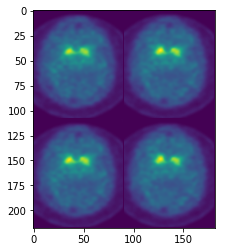

In [113]:
plt.imshow(im3841)

In [96]:
# loop through all the DICOM files
image_array_3437 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    im3435 = np.vstack([ds.pixel_array[34],ds.pixel_array[35]])
    im3637 = np.vstack([ds.pixel_array[36],ds.pixel_array[37]])
    im3437 = np.hstack([im3435,im3637])
    image_array_3437.append(im3437)
    #For debug corrupted image
    print(np.asarray(image_array_3437).shape)

0
(1, 218, 182)
1
(2, 218, 182)
2
(3, 218, 182)
3
(4, 218, 182)
4
(5, 218, 182)
5
(6, 218, 182)
6
(7, 218, 182)
7
(8, 218, 182)
8
(9, 218, 182)
9
(10, 218, 182)
10
(11, 218, 182)
11
(12, 218, 182)
12
(13, 218, 182)
13
(14, 218, 182)
14
(15, 218, 182)
15
(16, 218, 182)
16
(17, 218, 182)
17
(18, 218, 182)
18
(19, 218, 182)
19
(20, 218, 182)
20
(21, 218, 182)
21
(22, 218, 182)
22
(23, 218, 182)
23
(24, 218, 182)
24
(25, 218, 182)
25
(26, 218, 182)
26
(27, 218, 182)
27
(28, 218, 182)
28
(29, 218, 182)
29
(30, 218, 182)
30
(31, 218, 182)
31
(32, 218, 182)
32
(33, 218, 182)
33
(34, 218, 182)
34
(35, 218, 182)
35
(36, 218, 182)
36
(37, 218, 182)
37
(38, 218, 182)
38
(39, 218, 182)
39
(40, 218, 182)
40
(41, 218, 182)
41
(42, 218, 182)
42
(43, 218, 182)
43
(44, 218, 182)
44
(45, 218, 182)
45
(46, 218, 182)
46
(47, 218, 182)
47
(48, 218, 182)
48
(49, 218, 182)
49
(50, 218, 182)
50
(51, 218, 182)
51
(52, 218, 182)
52
(53, 218, 182)
53
(54, 218, 182)
54
(55, 218, 182)
55
(56, 218, 182)
56
(57, 218

(423, 218, 182)
423
(424, 218, 182)
424
(425, 218, 182)
425
(426, 218, 182)
426
(427, 218, 182)
427
(428, 218, 182)
428
(429, 218, 182)
429
(430, 218, 182)
430
(431, 218, 182)
431
(432, 218, 182)
432
(433, 218, 182)
433
(434, 218, 182)
434
(435, 218, 182)
435
(436, 218, 182)
436
(437, 218, 182)
437
(438, 218, 182)
438
(439, 218, 182)
439
(440, 218, 182)
440
(441, 218, 182)
441
(442, 218, 182)
442
(443, 218, 182)
443
(444, 218, 182)
444
(445, 218, 182)
445
(446, 218, 182)
446
(447, 218, 182)
447
(448, 218, 182)
448
(449, 218, 182)
449
(450, 218, 182)
450
(451, 218, 182)
451
(452, 218, 182)
452
(453, 218, 182)
453
(454, 218, 182)
454
(455, 218, 182)
455
(456, 218, 182)
456
(457, 218, 182)
457
(458, 218, 182)
458
(459, 218, 182)
459
(460, 218, 182)
460
(461, 218, 182)
461
(462, 218, 182)
462
(463, 218, 182)
463
(464, 218, 182)
464
(465, 218, 182)
465
(466, 218, 182)
466
(467, 218, 182)
467
(468, 218, 182)
468
(469, 218, 182)
469
(470, 218, 182)
470
(471, 218, 182)
471
(472, 218, 182)
472


In [97]:
# loop through all the DICOM files
image_array_3841 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    im3839 = np.vstack([ds.pixel_array[38],ds.pixel_array[39]])
    im4041 = np.vstack([ds.pixel_array[40],ds.pixel_array[41]])
    im3841 = np.hstack([im3839,im4041])
    image_array_3841.append(im3841)
    #For debug corrupted image
    print(np.asarray(image_array_3841).shape)

0
(1, 218, 182)
1
(2, 218, 182)
2
(3, 218, 182)
3
(4, 218, 182)
4
(5, 218, 182)
5
(6, 218, 182)
6
(7, 218, 182)
7
(8, 218, 182)
8
(9, 218, 182)
9
(10, 218, 182)
10
(11, 218, 182)
11
(12, 218, 182)
12
(13, 218, 182)
13
(14, 218, 182)
14
(15, 218, 182)
15
(16, 218, 182)
16
(17, 218, 182)
17
(18, 218, 182)
18
(19, 218, 182)
19
(20, 218, 182)
20
(21, 218, 182)
21
(22, 218, 182)
22
(23, 218, 182)
23
(24, 218, 182)
24
(25, 218, 182)
25
(26, 218, 182)
26
(27, 218, 182)
27
(28, 218, 182)
28
(29, 218, 182)
29
(30, 218, 182)
30
(31, 218, 182)
31
(32, 218, 182)
32
(33, 218, 182)
33
(34, 218, 182)
34
(35, 218, 182)
35
(36, 218, 182)
36
(37, 218, 182)
37
(38, 218, 182)
38
(39, 218, 182)
39
(40, 218, 182)
40
(41, 218, 182)
41
(42, 218, 182)
42
(43, 218, 182)
43
(44, 218, 182)
44
(45, 218, 182)
45
(46, 218, 182)
46
(47, 218, 182)
47
(48, 218, 182)
48
(49, 218, 182)
49
(50, 218, 182)
50
(51, 218, 182)
51
(52, 218, 182)
52
(53, 218, 182)
53
(54, 218, 182)
54
(55, 218, 182)
55
(56, 218, 182)
56
(57, 218

(427, 218, 182)
427
(428, 218, 182)
428
(429, 218, 182)
429
(430, 218, 182)
430
(431, 218, 182)
431
(432, 218, 182)
432
(433, 218, 182)
433
(434, 218, 182)
434
(435, 218, 182)
435
(436, 218, 182)
436
(437, 218, 182)
437
(438, 218, 182)
438
(439, 218, 182)
439
(440, 218, 182)
440
(441, 218, 182)
441
(442, 218, 182)
442
(443, 218, 182)
443
(444, 218, 182)
444
(445, 218, 182)
445
(446, 218, 182)
446
(447, 218, 182)
447
(448, 218, 182)
448
(449, 218, 182)
449
(450, 218, 182)
450
(451, 218, 182)
451
(452, 218, 182)
452
(453, 218, 182)
453
(454, 218, 182)
454
(455, 218, 182)
455
(456, 218, 182)
456
(457, 218, 182)
457
(458, 218, 182)
458
(459, 218, 182)
459
(460, 218, 182)
460
(461, 218, 182)
461
(462, 218, 182)
462
(463, 218, 182)
463
(464, 218, 182)
464
(465, 218, 182)
465
(466, 218, 182)
466
(467, 218, 182)
467
(468, 218, 182)
468
(469, 218, 182)
469
(470, 218, 182)
470
(471, 218, 182)
471
(472, 218, 182)
472
(473, 218, 182)
473
(474, 218, 182)
474
(475, 218, 182)
475
(476, 218, 182)
476


In [98]:
# loop through all the DICOM files
image_array_4245 =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM:
    print(lstFilesDCM.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    im4243 = np.vstack([ds.pixel_array[42],ds.pixel_array[43]])
    im4445 = np.vstack([ds.pixel_array[44],ds.pixel_array[45]])
    im4245 = np.hstack([im4243,im4445])
    image_array_4245.append(im4245)
    #For debug corrupted image
    print(np.asarray(image_array_4245).shape)

0
(1, 218, 182)
1
(2, 218, 182)
2
(3, 218, 182)
3
(4, 218, 182)
4
(5, 218, 182)
5
(6, 218, 182)
6
(7, 218, 182)
7
(8, 218, 182)
8
(9, 218, 182)
9
(10, 218, 182)
10
(11, 218, 182)
11
(12, 218, 182)
12
(13, 218, 182)
13
(14, 218, 182)
14
(15, 218, 182)
15
(16, 218, 182)
16
(17, 218, 182)
17
(18, 218, 182)
18
(19, 218, 182)
19
(20, 218, 182)
20
(21, 218, 182)
21
(22, 218, 182)
22
(23, 218, 182)
23
(24, 218, 182)
24
(25, 218, 182)
25
(26, 218, 182)
26
(27, 218, 182)
27
(28, 218, 182)
28
(29, 218, 182)
29
(30, 218, 182)
30
(31, 218, 182)
31
(32, 218, 182)
32
(33, 218, 182)
33
(34, 218, 182)
34
(35, 218, 182)
35
(36, 218, 182)
36
(37, 218, 182)
37
(38, 218, 182)
38
(39, 218, 182)
39
(40, 218, 182)
40
(41, 218, 182)
41
(42, 218, 182)
42
(43, 218, 182)
43
(44, 218, 182)
44
(45, 218, 182)
45
(46, 218, 182)
46
(47, 218, 182)
47
(48, 218, 182)
48
(49, 218, 182)
49
(50, 218, 182)
50
(51, 218, 182)
51
(52, 218, 182)
52
(53, 218, 182)
53
(54, 218, 182)
54
(55, 218, 182)
55
(56, 218, 182)
56
(57, 218

(423, 218, 182)
423
(424, 218, 182)
424
(425, 218, 182)
425
(426, 218, 182)
426
(427, 218, 182)
427
(428, 218, 182)
428
(429, 218, 182)
429
(430, 218, 182)
430
(431, 218, 182)
431
(432, 218, 182)
432
(433, 218, 182)
433
(434, 218, 182)
434
(435, 218, 182)
435
(436, 218, 182)
436
(437, 218, 182)
437
(438, 218, 182)
438
(439, 218, 182)
439
(440, 218, 182)
440
(441, 218, 182)
441
(442, 218, 182)
442
(443, 218, 182)
443
(444, 218, 182)
444
(445, 218, 182)
445
(446, 218, 182)
446
(447, 218, 182)
447
(448, 218, 182)
448
(449, 218, 182)
449
(450, 218, 182)
450
(451, 218, 182)
451
(452, 218, 182)
452
(453, 218, 182)
453
(454, 218, 182)
454
(455, 218, 182)
455
(456, 218, 182)
456
(457, 218, 182)
457
(458, 218, 182)
458
(459, 218, 182)
459
(460, 218, 182)
460
(461, 218, 182)
461
(462, 218, 182)
462
(463, 218, 182)
463
(464, 218, 182)
464
(465, 218, 182)
465
(466, 218, 182)
466
(467, 218, 182)
467
(468, 218, 182)
468
(469, 218, 182)
469
(470, 218, 182)
470
(471, 218, 182)
471
(472, 218, 182)
472


In [99]:
#Stack up to made RGB, so we can use pretrain model
image_array = np.stack([image_array_3437, image_array_3841, image_array_4245], axis=3)

For NORMAL Image

In [ ]:
#Training Set

In [11]:
# loop through all the DICOM files
image_array_39_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_train.append(ds.pixel_array[39])
    #For debug corrupted image
    print(np.asarray(image_array_39_train).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(448, 109, 91)
448
(449, 109, 91)
449
(450, 109, 91)
450
(451, 109, 91)
451
(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 91)
496
(497, 109, 91)
497
(498, 109, 91)
498
(499, 109, 91)
499
(500, 109, 9

In [10]:
# loop through all the DICOM files
image_array_40_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40_train.append(ds.pixel_array[40])
    #For debug corrupted image
    print(np.asarray(image_array_40_train).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 91)
496
(497, 109, 91)
497
(498, 109, 91)
498
(499, 109, 91)
499
(500, 109, 91)
500
(501, 109, 91)
501
(502, 109, 91)
502
(503, 109, 91)
503
(504, 109, 9

In [12]:
# loop through all the DICOM files
image_array_41_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_train.append(ds.pixel_array[41])
    #For debug corrupted image
    print(np.asarray(image_array_41_train).shape)

0
(1, 109, 91)
1
(2, 109, 91)
2
(3, 109, 91)
3
(4, 109, 91)
4
(5, 109, 91)
5
(6, 109, 91)
6
(7, 109, 91)
7
(8, 109, 91)
8
(9, 109, 91)
9
(10, 109, 91)
10
(11, 109, 91)
11
(12, 109, 91)
12
(13, 109, 91)
13
(14, 109, 91)
14
(15, 109, 91)
15
(16, 109, 91)
16
(17, 109, 91)
17
(18, 109, 91)
18
(19, 109, 91)
19
(20, 109, 91)
20
(21, 109, 91)
21
(22, 109, 91)
22
(23, 109, 91)
23
(24, 109, 91)
24
(25, 109, 91)
25
(26, 109, 91)
26
(27, 109, 91)
27
(28, 109, 91)
28
(29, 109, 91)
29
(30, 109, 91)
30
(31, 109, 91)
31
(32, 109, 91)
32
(33, 109, 91)
33
(34, 109, 91)
34
(35, 109, 91)
35
(36, 109, 91)
36
(37, 109, 91)
37
(38, 109, 91)
38
(39, 109, 91)
39
(40, 109, 91)
40
(41, 109, 91)
41
(42, 109, 91)
42
(43, 109, 91)
43
(44, 109, 91)
44
(45, 109, 91)
45
(46, 109, 91)
46
(47, 109, 91)
47
(48, 109, 91)
48
(49, 109, 91)
49
(50, 109, 91)
50
(51, 109, 91)
51
(52, 109, 91)
52
(53, 109, 91)
53
(54, 109, 91)
54
(55, 109, 91)
55
(56, 109, 91)
56
(57, 109, 91)
57
(58, 109, 91)
58
(59, 109, 91)
59
(60, 109, 91)

(445, 109, 91)
445
(446, 109, 91)
446
(447, 109, 91)
447
(448, 109, 91)
448
(449, 109, 91)
449
(450, 109, 91)
450
(451, 109, 91)
451
(452, 109, 91)
452
(453, 109, 91)
453
(454, 109, 91)
454
(455, 109, 91)
455
(456, 109, 91)
456
(457, 109, 91)
457
(458, 109, 91)
458
(459, 109, 91)
459
(460, 109, 91)
460
(461, 109, 91)
461
(462, 109, 91)
462
(463, 109, 91)
463
(464, 109, 91)
464
(465, 109, 91)
465
(466, 109, 91)
466
(467, 109, 91)
467
(468, 109, 91)
468
(469, 109, 91)
469
(470, 109, 91)
470
(471, 109, 91)
471
(472, 109, 91)
472
(473, 109, 91)
473
(474, 109, 91)
474
(475, 109, 91)
475
(476, 109, 91)
476
(477, 109, 91)
477
(478, 109, 91)
478
(479, 109, 91)
479
(480, 109, 91)
480
(481, 109, 91)
481
(482, 109, 91)
482
(483, 109, 91)
483
(484, 109, 91)
484
(485, 109, 91)
485
(486, 109, 91)
486
(487, 109, 91)
487
(488, 109, 91)
488
(489, 109, 91)
489
(490, 109, 91)
490
(491, 109, 91)
491
(492, 109, 91)
492
(493, 109, 91)
493
(494, 109, 91)
494
(495, 109, 91)
495
(496, 109, 91)
496
(497, 109, 9

In [13]:
#Stack up to made RGB, so we can use pretrain model
image_array_train = np.vstack((
    np.stack([image_array_39_train, image_array_39_train, image_array_39_train], axis=3),
    np.stack([image_array_40_train, image_array_40_train, image_array_40_train], axis=3),
    np.stack([image_array_41_train, image_array_41_train, image_array_41_train], axis=3)))

In [26]:
image_array_train.shape

(2064, 109, 91, 3)

In [ ]:
#Validation set

In [15]:
'''# loop through all the DICOM files
image_array_39_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_val.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40_val.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_val.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

#Stack up to made RGB, so we can use pretrain model
'''image_array_val = np.vstack((
    np.stack([image_array_39_val, image_array_39_val, image_array_39_val], axis=3),
    np.stack([image_array_40_val, image_array_40_val, image_array_40_val], axis=3),
    np.stack([image_array_41_val, image_array_41_val, image_array_41_val], axis=3)))'''

image_array_val = np.stack([image_array_40_val, image_array_40_val, image_array_40_val], axis=3)

image_array_val.shape

(295, 109, 91, 3)

In [16]:
#Test set

In [17]:
'''# loop through all the DICOM files
image_array_39_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_test.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40_test.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_test.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

'''#Stack up to made RGB, so we can use pretrain model
image_array_test = np.vstack((
    np.stack([image_array_39_test, image_array_39_test, image_array_39_test], axis=3),
    np.stack([image_array_40_test, image_array_40_test, image_array_40_test], axis=3),
    np.stack([image_array_41_test, image_array_41_test, image_array_41_test], axis=3)))'''

image_array_test = np.stack([image_array_40_test, image_array_40_test, image_array_40_test], axis=3)


image_array_test.shape

(246, 109, 91, 3)

In [18]:
#Check matched data-result by Image ID number
lstFilesDCM_test[0:5]

['./PPMI/3516/Reconstructed_DaTSCAN/2015-07-29_12_56_28.0/S492285/PPMI_3516_NM_Reconstructed_DaTSCAN_Br_20160818164847024_1_S492285_I767699.dcm',
 './PPMI 5/4029/Reconstructed_DaTSCAN/2012-10-12_08_09_17.0/S175503/PPMI_4029_NM_Reconstructed_DaTSCAN_Br_20130116130715037_1_S175503_I355244.dcm',
 './PPMI 9/3367/Reconstructed_DaTSCAN/2011-08-03_14_02_56.0/S120190/PPMI_3367_NM_Reconstructed_DaTSCAN_Br_20121015085616129_1_S120190_I339916.dcm',
 './PPMI 2/3190/Reconstructed_DaTSCAN/2013-03-12_13_30_59.0/S199540/PPMI_3190_NM_Reconstructed_DaTSCAN_Br_20130909134533420_1_S199540_I388485.dcm',
 './PPMI 8/3828/Reconstructed_DaTSCAN/2012-09-06_14_03_02.0/S170179/PPMI_3828_NM_Reconstructed_DaTSCAN_Br_20130909084245810_1_S170179_I388150.dcm']

In [19]:
X_test[0:5]

,Image Data ID,Group,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1
1287,767699,PD,./PPMI/3516/Reconstructed_DaTSCAN/2015-07-29_1...,21.000000,35.000000,20.0,NaN,21.000000
926,355244,PD,./PPMI 5/4029/Reconstructed_DaTSCAN/2012-10-12...,18.500000,20.750000,21.0,24.5,18.500000
504,339916,PD,./PPMI 9/3367/Reconstructed_DaTSCAN/2011-08-03...,21.000000,21.500000,22.0,NaN,21.000000
1178,388485,PD,./PPMI 2/3190/Reconstructed_DaTSCAN/2013-03-12...,27.000000,37.333333,58.5,35.0,27.000000
961,388150,PD,./PPMI 8/3828/Reconstructed_DaTSCAN/2012-09-06...,17.333333,30.000000,29.0,20.0,17.333333


In [20]:
df = pd.concat([df1to4,df1to4,df1to4])

In [21]:
df1to4 = df

In [22]:
df1to4.loc[df1to4['Group']=='Control']

,Image Data ID,Group,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1


In [23]:
y_train = y_train.values
y_train = np.hstack((y_train,y_train,y_train))
y_val = y_val.values
#y_val= np.hstack((y_val,y_val,y_val))
y_test = y_test.values
#y_val= np.hstack((y_val,y_val,y_val))

In [24]:
y = y.astype('float')
y.dtype

NameError: name 'y' is not defined

In [28]:
augs = [RandomFlip()]

In [78]:
arch=resnet34
#arch=resnext50
#arch=inceptionv4
bs=64
sz=101
#tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_side_on)
tfms = tfms_from_model(arch, sz,crop_type=CropType.NO, aug_tfms=augs)
data = ImageClassifierData.from_arrays('.', bs=bs, trn=(image_array_train,y_train), val=(image_array_val,y_val), test=image_array_test, tfms=tfms)


In [79]:
head_res_34 = nn.Sequential(
nn.AdaptiveAvgPool2d(output_size=(1, 1)),nn.AdaptiveMaxPool2d(output_size=(1, 1))
,Flatten()
,nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
,nn.Dropout(p=0.2)
,nn.Linear(in_features=512, out_features=512)
,nn.ReLU()
,nn.BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True)
,nn.Dropout(p=0.2)
,nn.Linear(in_features=512, out_features=1)
)

nn.Sequential(Flatten(),
                          nn.Linear(8192, 1))
head_incep_4 = nn.Sequential(Flatten(),
                          nn.Linear(1001, 1))
head_resnext_50 = nn.Sequential(Flatten(),
                          nn.Linear(32768, 1))
learn = ConvLearner.pretrained(arch, data, precompute=False, custom_head=head_res_34)
learn.opt_fn = optim.Adam
learn.crit = nn.MSELoss()

In [73]:
learn.summary()

OrderedDict([('Conv2d-1',
              OrderedDict([('input_shape', [-1, 3, 109, 109]),
                           ('output_shape', [-1, 64, 55, 55]),
                           ('trainable', False),
                           ('nb_params', 9408)])),
             ('BatchNorm2d-2',
              OrderedDict([('input_shape', [-1, 64, 55, 55]),
                           ('output_shape', [-1, 64, 55, 55]),
                           ('trainable', False),
                           ('nb_params', 128)])),
             ('ReLU-3',
              OrderedDict([('input_shape', [-1, 64, 55, 55]),
                           ('output_shape', [-1, 64, 55, 55]),
                           ('nb_params', 0)])),
             ('MaxPool2d-4',
              OrderedDict([('input_shape', [-1, 64, 55, 55]),
                           ('output_shape', [-1, 64, 28, 28]),
                           ('nb_params', 0)])),
             ('Conv2d-5',
              OrderedDict([('input_shape', [-1, 64, 28, 28]),
      

In [111]:
learn.load('inceptionv4')

In [86]:
learn.fit(1e-2, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      121.688123 119.414851 0.0       
    1      120.572299 129.220057 0.0                     
    2      119.377588 120.194577 0.0                     



[array([120.19458]), 0.0]

In [42]:
learn.fit(3e-5, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      297996.42613 131891.097934 0.0       
    1      190405.621762 114908.642876 0.0                    
    2      140149.167236 131161.691181 0.0                    
    3      117336.734357 105974.530508 0.0                    
    4      98370.347696 72866.827145 0.0                      



[array([72866.82715]), 0.0]

In [123]:
learn.save('inceptionv4_1yr')

In [116]:
learn.load('inceptionv4_1yr')

In [82]:
learn.freeze_to(-8)

In [44]:
learn.fit(3e-5, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      196.907544 111.329857 0.0       
    1      134.503418 111.381502 0.0                     
    2      107.684442 110.724795 0.0                     
    3      90.245366  121.234155 0.0                      
    4      76.196313  111.012269 0.0                      



[array([111.01227]), 0.0]

In [256]:
learn.save('resnext50_1yr')

In [258]:
learn.load('resnext50_1yr')

In [103]:
learn.save('resnet34_1yr')

In [121]:
learn.load('resnet34_1yr')

In [84]:
learn.unfreeze()

In [145]:
learn.fit(6e-5, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      114.698214 111.782952 0.0       
    1      77.481669  122.261299 0.0                      
    2      51.434888  134.198236 0.0                      
    3      33.870712  137.295205 0.0                      
    4      23.098356  126.138291 0.0                      



[array([126.13829]), 0.0]

In [84]:
learn.fit(4e-4, 3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      5.406461   23.082064  0.0       
    1      4.760156   23.5797    0.0                      
    2      5.89165    24.047318  0.0                      



[array([24.04732]), 0.0]

In [91]:
lr = 1e-3
lrs = np.array([lr/9,lr/3,lr])

In [92]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 29/33 [00:08<00:01,  3.41it/s, loss=678]


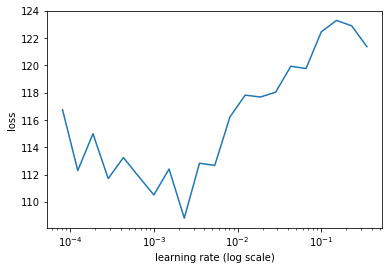

In [93]:
learn.sched.plot(n_skip=5, n_skip_end=2)

In [96]:
#learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      114.323615 118.038187 0.0       
    1      114.915999 202.137843 0.0                     
    2      116.277604 118.342918 0.0                     
    3      114.257097 118.25923  0.0                     
    4      115.601858 118.339218 0.0                     
    5      114.677898 118.093912 0.0                     
    6      113.835784 130.860271 0.0                     



[array([130.86027]), 0.0]

In [ ]:
learn.save('2x2_inceptionv4')

In [95]:
learn.opt_fn = optim.Adagrad

In [92]:
lr=1e-5

In [149]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      4.826837   124.788275 0.0       
    1      4.527363   123.217676 0.0                      
    2      4.721651   123.487259 0.0                      
    3      4.743594   123.266518 0.0                      
    4      4.975759   123.409174 0.0                      
    5      4.806789   124.178724 0.0                      
    6      4.808863   124.155712 0.0                      



[array([124.15571]), 0.0]

In [262]:
lr = 1e-6

In [263]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      4.158639   111.386424 0.0       
    1      4.555673   110.545693 0.0                      
    2      4.723434   113.051315 0.0                      
    3      4.969178   110.401847 0.0                      
    4      4.915447   116.471148 0.0                      
    5      4.70188    113.709343 0.0                      
    6      4.442261   112.094514 0.0                      



[array([112.09451]), 0.0]

In [202]:
learn.save('2x2_resnet_34')

In [236]:
learn.load('2x2_resnet_34')

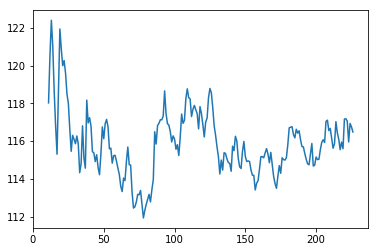

In [97]:
learn.sched.plot_loss()

In [98]:
learn.opt_fn = optim.RMSprop

In [99]:
lr=1e-3

In [109]:
learn.fit(lrs, 3, cycle_len=1, cycle_mult=3)

HBox(children=(IntProgress(value=0, description='Epoch', max=13), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                
    0      117.134786 115.782654 0.0       
    1      114.215138 113.973421 0.0                     
    2      115.499306 116.446881 0.0                     
    3      113.161165 113.038846 0.0                     
    4      111.787635 114.287116 0.0                     
    5      113.813834 114.57694  0.0                     
    6      113.771229 113.584044 0.0                     
    7      112.956942 112.600517 0.0                     
    8      112.564306 113.748909 0.0                     
    9      113.399863 113.772217 0.0                     
    10     114.406674 112.829327 0.0                     
    11     114.006545 112.48089  0.0                     
    12     113.199667 114.489084 0.0                     



[array([114.48908]), 0.0]

In [110]:
y_pred = learn.predict(is_test=image_array_test.any())

In [111]:
y_pred

array([[14.22036],
       [24.37405],
       [25.88053],
       [23.68754],
       [22.34695],
       [25.47785],
       [26.07869],
       [27.23581],
       [22.89692],
       [25.77801],
       [24.10117],
       [23.7922 ],
       [29.46474],
       [23.06494],
       [28.5541 ],
       [23.46793],
       [27.39787],
       [26.11642],
       [26.09735],
       [25.39754],
       [26.77039],
       [25.63298],
       [24.70211],
       [25.64604],
       [25.40231],
       [25.77121],
       [26.98036],
       [24.52146],
       [21.41446],
       [23.18837],
       [26.38548],
       [26.64081],
       [25.70252],
       [25.63915],
       [23.86451],
       [23.68719],
       [23.69592],
       [22.63815],
       [22.75272],
       [25.90563],
       [24.66633],
       [23.533  ],
       [22.81739],
       [23.61381],
       [24.11131],
       [28.49143],
       [17.72504],
       [26.35727],
       [26.21774],
       [23.58814],
       [25.58595],
       [25.93039],
       [26.0

In [112]:
y_test

array([35.     , 20.75   , 21.5    , 37.33333, 30.     , 41.25   ,  6.     , 18.33333, 28.5    , 26.5    ,
       17.5    , 10.     , 37.     , 28.66667, 51.     , 26.5    , 50.     , 14.     , 32.5    ,  9.     ,
       29.     , 22.     , 26.     , 47.5    , 30.5    , 30.     , 20.5    , 49.     , 42.     , 23.     ,
       18.5    , 20.5    , 41.     , 22.5    , 27.     , 18.5    , 33.     , 28.     , 12.     , 41.     ,
       17.     , 25.5    , 10.66667, 18.33333,  7.     , 39.     , 49.     , 36.25   , 35.     ,  9.33333,
       45.     , 28.     , 38.66667, 29.     , 21.5    , 21.     , 16.     , 13.5    , 17.     , 33.     ,
       41.5    , 44.5    , 27.     , 31.     ,  9.     , 18.     , 15.5    ,  5.     , 36.     , 34.     ,
       37.     , 48.     , 13.     , 22.     , 15.     , 41.     , 18.     , 40.33333, 26.5    , 32.5    ,
       32.     , 27.     , 17.     ,  8.5    , 11.     , 25.5    , 13.66667, 22.     , 31.5    ,  8.     ,
       37.     , 34.     , 43.5    , 

In [113]:
df_pred = pd.DataFrame(y_test,columns=['TEST'])
df_y_pred = pd.DataFrame(y_pred,columns=['PRED'])

In [114]:
df_pred = df_pred.join(df_y_pred)

In [115]:
df_pred

,TEST,PRED
0,35.000000,14.220356
1,20.750000,24.374054
2,21.500000,25.880526
3,37.333333,23.687544
4,30.000000,22.346949
5,41.250000,25.477848
6,6.000000,26.078691
7,18.333333,27.235807
8,28.500000,22.896921
9,26.500000,25.778013


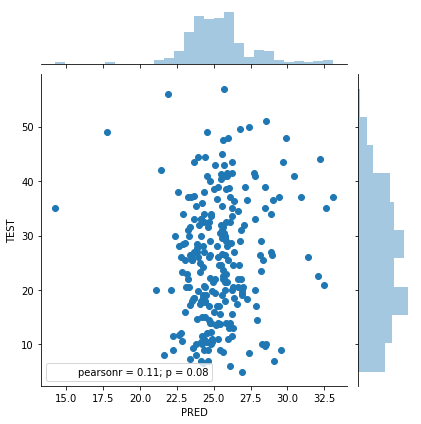

In [116]:
sns.jointplot(x='PRED' ,y='TEST', data=df_pred)

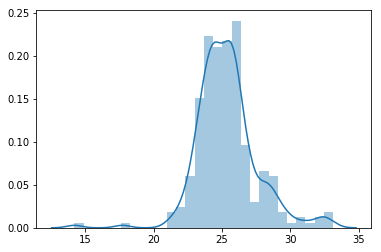

In [117]:
sns.distplot(y_pred)

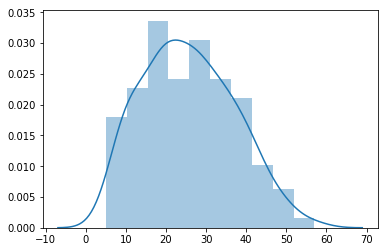

In [118]:
sns.distplot(y_test)